### Voraussetzungen
Falls nicht installiert, müssen Seaborn und Matplotlib zuerst installiert werden:

In [ ]:
# !pip install seaborn matplotlib

### Beispiel-Daten
Wir verwenden den Iris-Datensatz von Seaborn, um die Diagramme zu demonstrieren.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Beispiel-Daten laden
data = sns.load_dataset('iris')
df2 = pd.read_csv("Df2")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Der Iris-Datensatz ist ein berühmter Datensatz, der häufig in der Statistik und im maschinellen Lernen verwendet wird. Er enthält Messungen von vier Merkmalen von 150 Iris-Blumenarten: drei verschiedene Arten (setosa, versicolor, virginica).

Merkmale:
- sepal_length: Länge des Kelchblattes (in cm)
- sepal_width: Breite des Kelchblattes (in cm)
- petal_length: Länge des Blütenblattes (in cm)
- petal_width: Breite des Blütenblattes (in cm)
- species: Die Art der Iris-Blume (kategorische Variable: setosa, versicolor, virginica)

Struktur:
- 150 Zeilen (jeweils eine Beobachtung einer Blume)
- 5 Spalten (4 numerische Merkmale und eine kategoriale Zielvariable)

Dieser Datensatz wird oft verwendet, um Modelle zu trainieren, die Klassifikationen vornehmen, z. B. um die Art einer Iris-Blume anhand ihrer Blütenmerkmale zu bestimmen.

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1. Scatter Plot (Streudiagramm)
Ein Streudiagramm wird verwendet, um die Beziehung zwischen zwei kontinuierlichen Variablen zu zeigen.

#### `matplotlib`

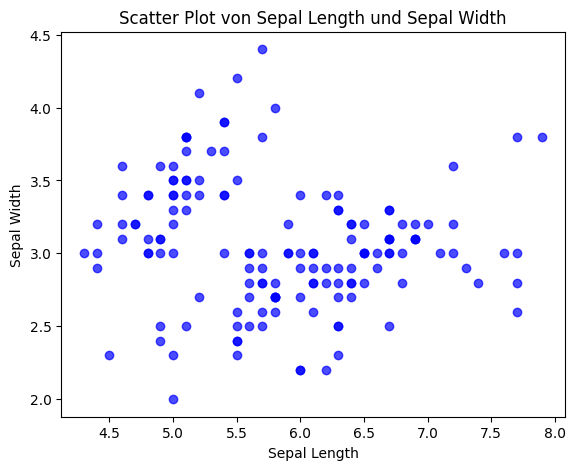

In [5]:
# Scatter Plot für die Variablen 'sepal_length' und 'sepal_width'
plt.figure(figsize=(6.5, 5))
plt.scatter(data['sepal_length'], data['sepal_width'], color='blue', alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot von Sepal Length und Sepal Width')
plt.show()

#### `pandas` - gleiches Bild mit nur einer Code-Zeile

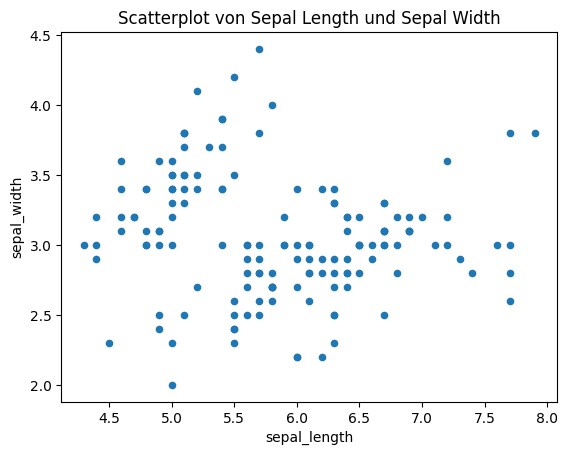

In [6]:
data.plot(kind="scatter",x='sepal_length', y='sepal_width', title="Scatterplot von Sepal Length und Sepal Width");

Man kann sogar 3 Werte damit darstellen:

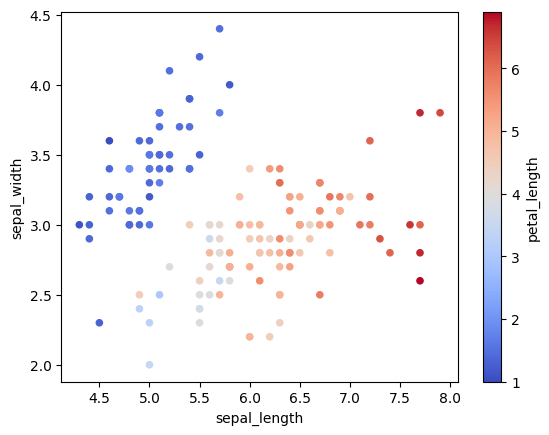

In [7]:
# 3.Dimension durch Farbe
data.plot(kind="scatter", x="sepal_length", y="sepal_width",c="petal_length", cmap='coolwarm');

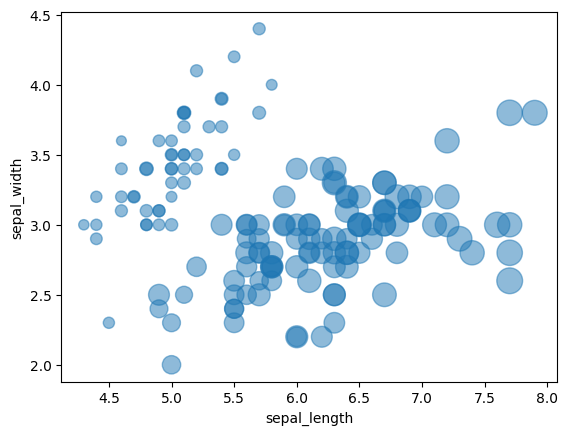

In [8]:
# 3.Dimension durch Größe
data.plot(kind="scatter", x="sepal_length", y="sepal_width",s=data["petal_length"]*50, alpha=0.5);


### 2. Balkendiagramm (Bar Plot)
Ein Balkendiagramm wird verwendet, um kategorische Daten darzustellen, indem die Häufigkeit oder der Durchschnitt einer Variablen für verschiedene Kategorien angezeigt wird.

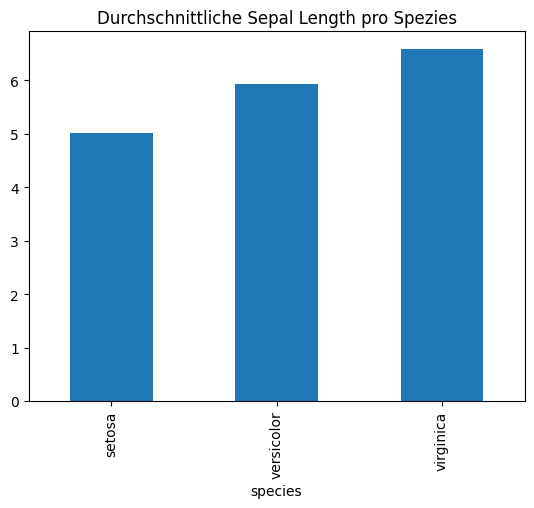

In [9]:
data.groupby("species")["sepal_length"].mean().plot(kind='bar', title="Durchschnittliche Sepal Length pro Spezies");

Alle Spalten nebeneinander anzeigen lassen:

<Axes: >

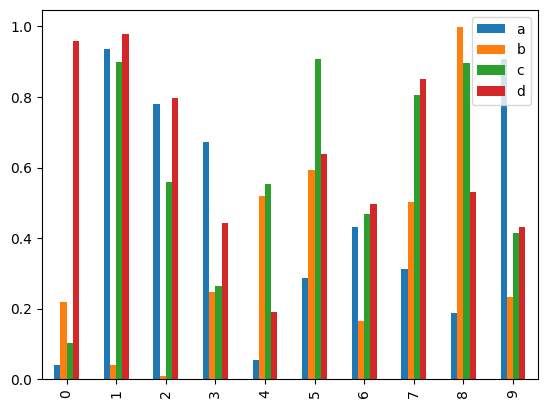

In [21]:
df2.plot(kind="bar")

Kann auch gesapelt dargestellt werden:

<Axes: >

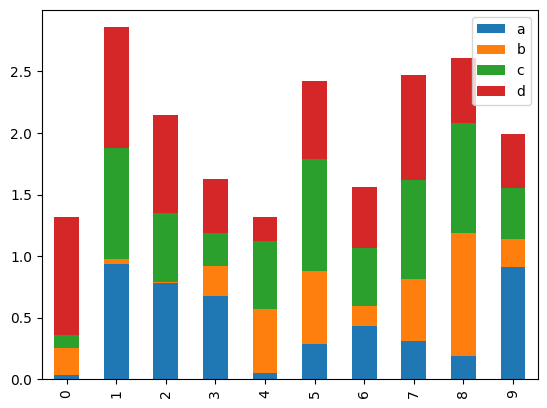

In [22]:
df2.plot(kind="bar", stacked=True)

Oder auch so:

<Axes: >

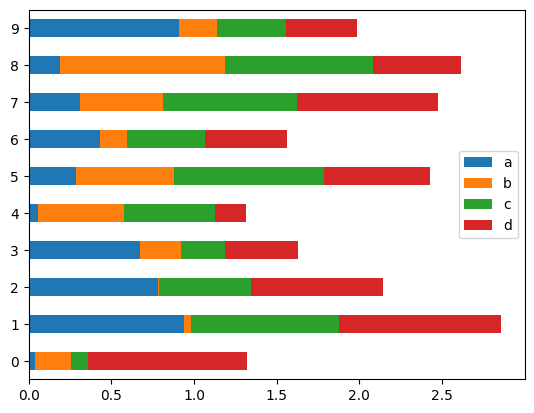

In [23]:
df2.plot(kind="barh", stacked=True)

### 3. Histogramm
Ein Histogramm zeigt die Verteilung einer einzelnen numerischen Variablen und ordnet die Werte in Intervalle (bins) ein.

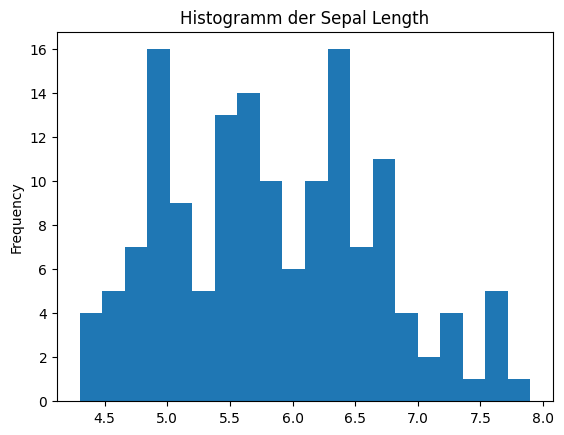

In [15]:
data["sepal_length"].plot(kind='hist', bins=20, title="Histogramm der Sepal Length");

### 4. Flächendiagramm (Area Plot)
Ein Flächendiagramm (Area Plot) wird verwendet, um die Veränderung von Daten über eine kontinuierliche Dimension darzustellen, wobei die Fläche unter der Kurve die kumulierten Werte anzeigt.

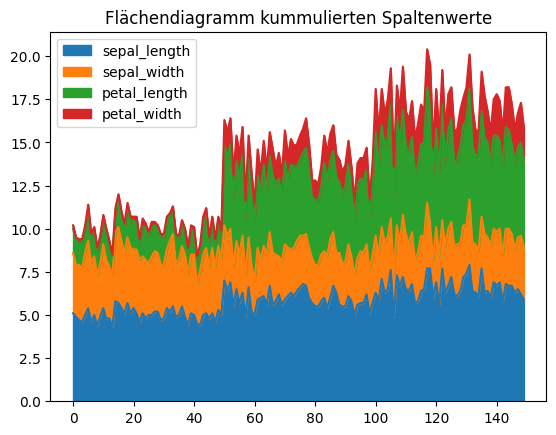

In [14]:
data.plot(kind='area', title="Flächendiagramm kummulierten Spaltenwerte");

### 5. Boxplot

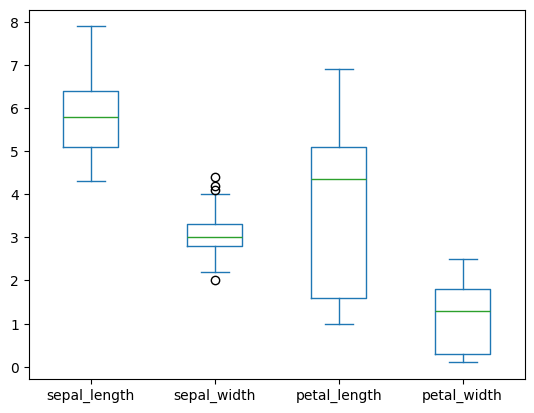

In [13]:
data.plot(kind="box");

### 6.Kreisdiagramm

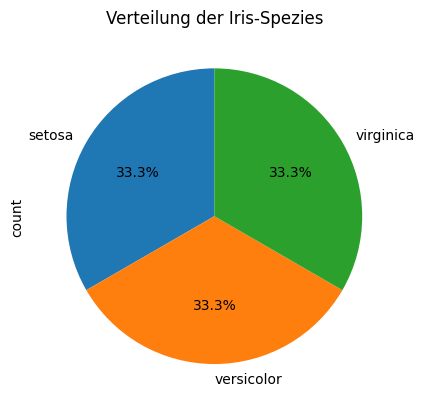

In [12]:
data['species'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Verteilung der Iris-Spezies", startangle=90);

### 7. histplot und kdeplot mit Seaborn
Pandas unterstützt diese Diagrammtypen direkt nicht. Dafür verwenden wir Seaborn.<br>

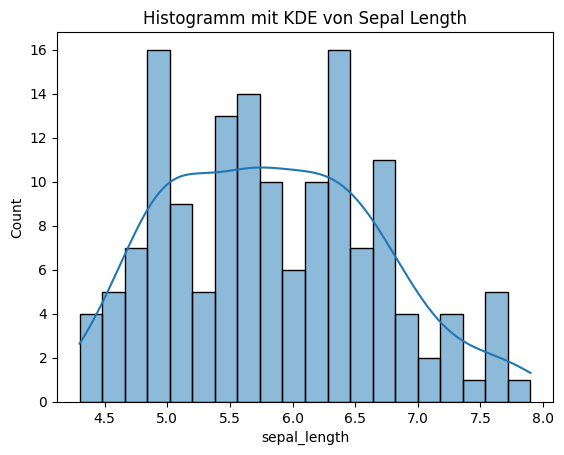

In [11]:
sns.histplot(data['sepal_length'],bins=20, kde=True)
plt.title("Histogramm mit KDE von Sepal Length")
plt.show()

**KDE (Kernel Density Estimation)** ist eine Methode zur Schätzung der Dichtefunktion einer Zufallsvariablen. Sie ist ein nicht-parametrisches Verfahren, das verwendet wird, um die zugrunde liegende Wahrscheinlichkeitsdichte von Daten zu schätzen, ohne eine bestimmte Verteilungsform (wie Normalverteilung) anzunehmen

#### KDE-Plot
Der KDE-Plot zeigt die Dichte einer Variablen und ist oft als Alternative zum Histogramm nützlich.

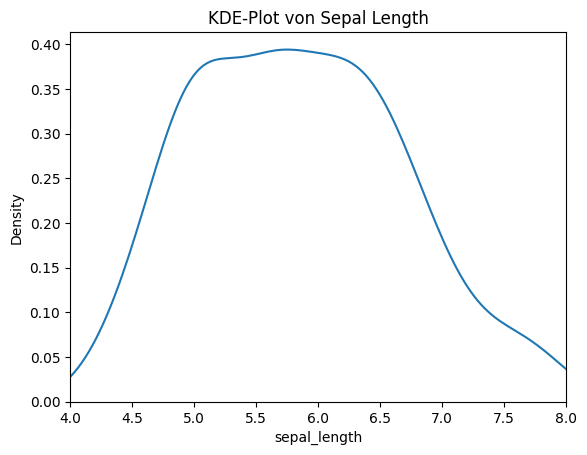

In [16]:
sns.kdeplot(data['sepal_length'])
plt.title("KDE-Plot von Sepal Length")
plt.xlim([4,8])
plt.show()

### 6. Pairplot
Der Pairplot zeigt Scatterplots für alle Variablenpaare und die Verteilung jeder Variable auf der Diagonalen.<br>
Das Argument hue in Seaborn-Visualisierungen, wie dem pairplot, wird verwendet, um die Daten nach einer kategorialen Variable zu färben. So lassen sich Unterschiede zwischen den Kategorien direkt in der Grafik erkennen.

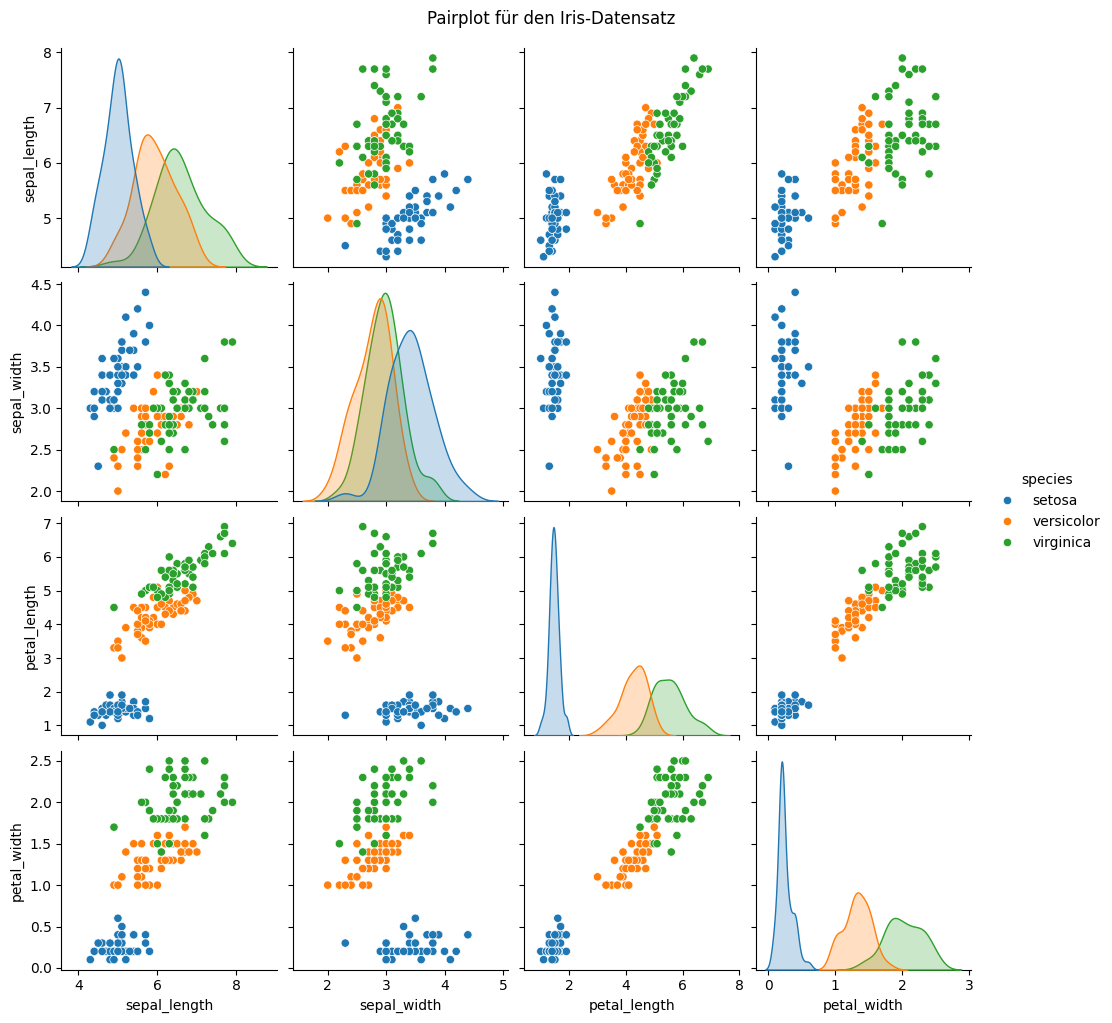

In [17]:
# Mit KDE t in der Diagonale
sns.pairplot(data, hue='species')
plt.suptitle("Pairplot für den Iris-Datensatz", y=1.02)
plt.show()

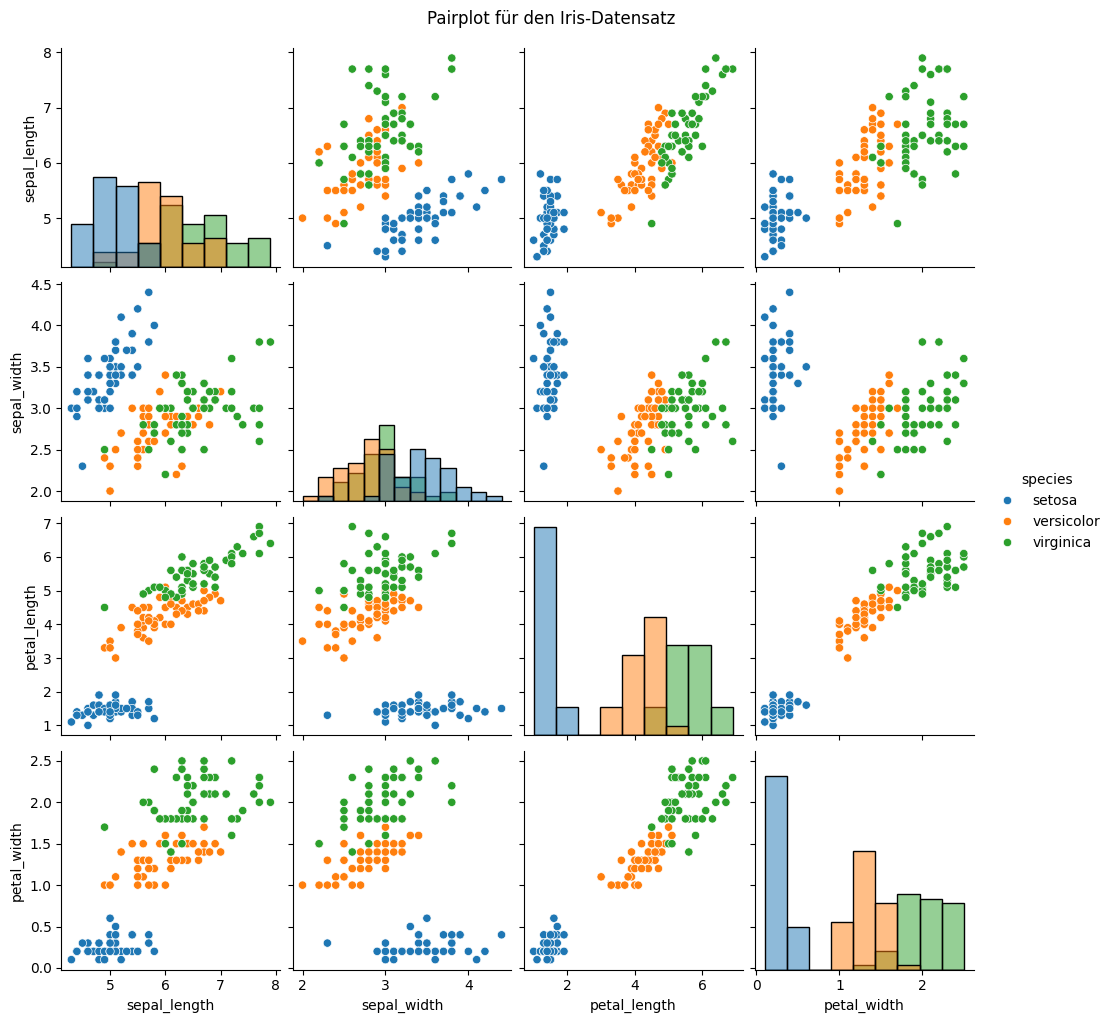

In [18]:
# Mit Hist Plot in der Diagonale
sns.pairplot(data, hue='species', diag_kind='hist')
plt.suptitle("Pairplot für den Iris-Datensatz", y=1.02)
plt.show()

### 7. Heatmap
Eignet sich gut zur Darstellung der Korrelationsmatrix:

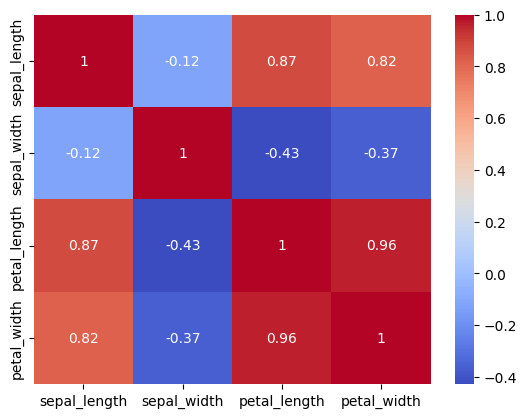

In [19]:
corr_m = data.corr(numeric_only=True)
sns.heatmap(corr_m, annot=True, cmap="coolwarm");